In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
image_data = pd.read_csv('./csv/activity_by_day_added_targets.csv', delimiter=';')

# # Convert the 'time' column to datetime format
image_data['time'] = pd.to_datetime(df['time'])

image_data

,time,mean_gray,count_pixels_lighter,week_of_year,slope,movement,worms,feeding_day,highlight,cutout,food
0,2024-06-29,24.884902,826212,26,-0.297420,1,0,0,0,0,Melon
1,2024-06-30,30.382977,4093642,26,5.498075,1,0,1,0,0,Melon
2,2024-07-01,43.052295,3651325,27,12.669318,1,0,0,0,0,Melon
3,2024-07-02,41.182413,7418499,27,-1.869882,1,1,0,0,0,Melon
4,2024-07-03,39.924396,11842906,27,-1.258017,1,1,1,0,1,Oats
...,...,...,...,...,...,...,...,...,...,...,...
112,2024-10-28,45.008231,93791939,44,-6.675343,0,0,1,0,1,Oats
113,2024-10-29,41.372159,138661651,44,-3.636072,0,0,0,0,1,Oats
114,2024-10-30,38.872445,136393567,44,-2.499714,0,0,0,0,1,Oats
115,2024-10-31,34.391360,135642726,44,-4.481085,0,0,0,0,1,Oats


In [11]:
image_data.describe()

,time,mean_gray,count_pixels_lighter
count,117,117.000000,1.170000e+02
mean,2024-08-26 12:55:23.076923136,31.596328,5.943165e+07
min,2024-06-29 00:00:00,11.423346,8.262120e+05
25%,2024-07-28 00:00:00,20.540703,3.339986e+07
50%,2024-08-26 00:00:00,30.382977,5.882564e+07
75%,2024-09-24 00:00:00,40.701598,8.312243e+07
max,2024-11-01 00:00:00,64.711140,1.386617e+08
std,NaN,13.752067,3.559336e+07


In [12]:
image_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   time                  117 non-null    datetime64[ns]
 1   mean_gray             117 non-null    float64       
 2   count_pixels_lighter  117 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 2.9 KB


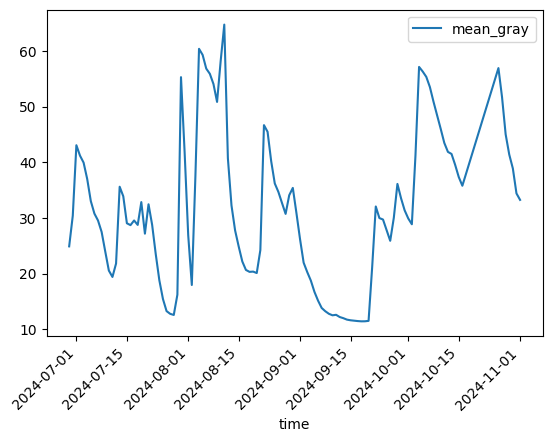

In [15]:
image_data.plot(x='time', y=['mean_gray'], kind='line')
plt.xticks(rotation=45)
plt.show()

## Clean

In [19]:
image_data_filtered = image_data[(image_data['feeding_day'] != 1) & (image_data['cutout'] != 1)]

image_data_filtered

,time,mean_gray,count_pixels_lighter,week_of_year,slope,movement,worms,feeding_day,highlight,cutout,food
0,2024-06-29,24.884902,826212,26,-0.297420,1,0,0,0,0,Melon
2,2024-07-01,43.052295,3651325,27,12.669318,1,0,0,0,0,Melon
3,2024-07-02,41.182413,7418499,27,-1.869882,1,1,0,0,0,Melon
14,2024-07-13,35.596787,11603093,28,13.791460,1,1,0,1,0,Beans
16,2024-07-15,29.035055,86875118,29,-4.845654,1,1,0,1,0,Beans
...,...,...,...,...,...,...,...,...,...,...,...
104,2024-10-11,43.454847,97176667,41,-2.529779,0,1,0,0,0,Melon
105,2024-10-12,41.853344,98307939,41,-1.601503,0,1,0,0,0,Melon
106,2024-10-13,41.480847,107386272,41,-0.372497,0,1,0,0,0,Melon
107,2024-10-14,39.530680,108608661,42,-1.950167,0,1,0,0,0,Melon


<Axes: >

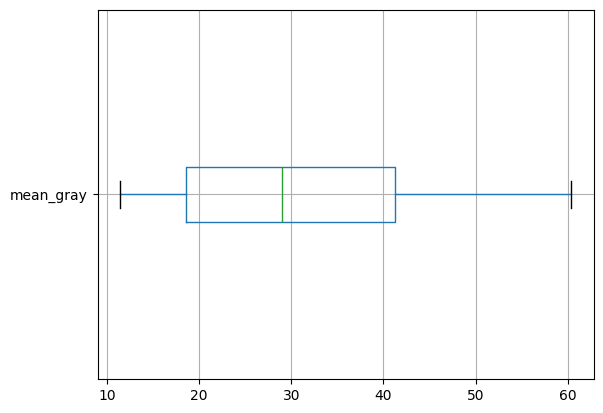

In [20]:
image_data_filtered.boxplot(column='mean_gray', vert=False)

## Check amount of worms detected for each day

In [45]:
# Load the CSV file into a DataFrame
detections = pd.read_csv('./data/csv/image-predictions.csv', usecols=['time', 'class', 'confidence', 'x', 'y', 'width', 'height'])

# Convert the 'time' column to datetime format
detections['time'] = pd.to_datetime(detections['time'])

detections

,time,x,y,width,height,class,confidence
0,2024-08-18 22:58:11.784157,486,428,57,27,worm,0.186
1,2024-08-19 08:49:07.848705,514,430,123,30,worm,0.357
2,2024-08-19 08:49:07.848705,957,252,75,118,worm,0.320
3,2024-08-19 09:01:47.573271,959,249,75,121,worm,0.779
4,2024-08-19 09:01:47.573271,503,429,102,28,worm,0.378
...,...,...,...,...,...,...,...
141629,2024-11-08 13:38:35.302109,82,83,131,160,worm,0.159
141630,2024-11-08 13:41:35.270319,78,83,134,160,worm,0.180
141631,2024-11-08 14:16:35.237698,966,446,115,74,worm,0.209
141632,2024-11-08 14:25:35.302170,93,84,140,165,worm,0.116


In [46]:
from shapely.geometry import box

# Function to check if two bounding boxes overlap
def is_overlap(row1, row2):
    box1 = box(row1['x'], row1['y'], row1['x'] + row1['width'], row1['y'] + row1['height'])
    box2 = box(row2['x'], row2['y'], row2['x'] + row2['width'], row2['y'] + row2['height'])
    return box1.intersects(box2)

# Sort detections by time
detections_sorted = detections.sort_values(by='time')

# Initialize a list to keep track of rows to keep
rows_to_keep = []

# Iterate through the sorted detections
for i, row in detections_sorted.iterrows():
    if i == 0:
        rows_to_keep.append(i)
    else:
        previous_row = detections_sorted.iloc[i - 1]
        if not is_overlap(row, previous_row):
            rows_to_keep.append(i)

# Filter the DataFrame to keep only non-overlapping rows
detections_non_overlapping = detections_sorted.loc[rows_to_keep]

detections_non_overlapping

,time,x,y,width,height,class,confidence
0,2024-08-18 22:58:11.784157,486,428,57,27,worm,0.186
2,2024-08-19 08:49:07.848705,957,252,75,118,worm,0.320
4,2024-08-19 09:01:47.573271,503,429,102,28,worm,0.378
5,2024-08-19 09:02:25.545031,958,252,73,118,worm,0.472
6,2024-08-19 09:02:25.545031,506,430,110,31,worm,0.280
...,...,...,...,...,...,...,...
141593,2024-11-08 11:25:35.237122,141,703,126,122,worm,0.560
141594,2024-11-08 11:25:35.237122,158,270,388,84,worm,0.223
141595,2024-11-08 12:37:35.270221,77,78,134,152,worm,0.106
141631,2024-11-08 14:16:35.237698,966,446,115,74,worm,0.209


In [49]:
detections_worm = detections_non_overlapping[detections_non_overlapping['class'] == 'worm']
detections_worm

,time,x,y,width,height,class,confidence
0,2024-08-18 22:58:11.784157,486,428,57,27,worm,0.186
2,2024-08-19 08:49:07.848705,957,252,75,118,worm,0.320
4,2024-08-19 09:01:47.573271,503,429,102,28,worm,0.378
5,2024-08-19 09:02:25.545031,958,252,73,118,worm,0.472
6,2024-08-19 09:02:25.545031,506,430,110,31,worm,0.280
...,...,...,...,...,...,...,...
141593,2024-11-08 11:25:35.237122,141,703,126,122,worm,0.560
141594,2024-11-08 11:25:35.237122,158,270,388,84,worm,0.223
141595,2024-11-08 12:37:35.270221,77,78,134,152,worm,0.106
141631,2024-11-08 14:16:35.237698,966,446,115,74,worm,0.209


In [65]:
# Group by day
detections_worm_by_day = detections_worm.resample('D', on='time').agg({
    'confidence': 'mean',
    'class': 'count'
}).rename(columns={'class': 'detections_count'})

detections_worm_by_day_confident = detections_worm_by_day[detections_worm_by_day['confidence'] > 0.7]

detections_worm_by_day.reset_index(inplace=True)

detections_worm_by_day

,time,confidence,detections_count
0,2024-08-18,0.186000,1
1,2024-08-19,0.483583,1866
2,2024-08-20,0.336615,2100
3,2024-08-21,0.372071,2837
4,2024-08-22,0.167000,135
...,...,...,...
78,2024-11-04,0.162692,402
79,2024-11-05,0.205513,454
80,2024-11-06,0.144685,89
81,2024-11-07,0.162585,65


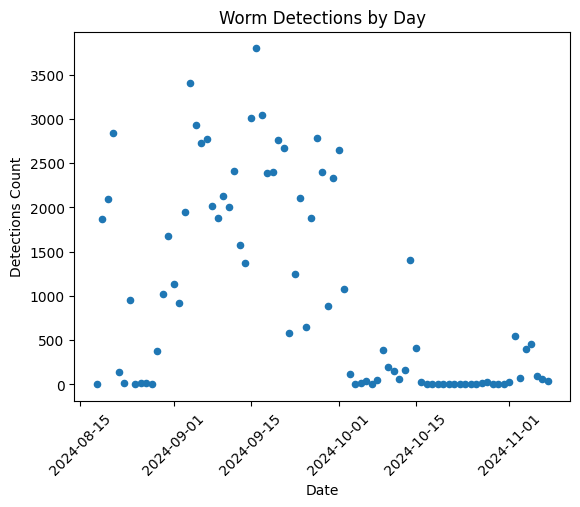

In [66]:
detections_worm_by_day.plot(x='time', y='detections_count', kind='scatter')
plt.xlabel('Date')
plt.ylabel('Detections Count')
plt.title('Worm Detections by Day')
plt.xticks(rotation=45)
plt.show()

In [70]:
# Merge the detections_worm_by_day DataFrame with df_by_day on the 'time' index
merged_df = image_data_filtered.merge(detections_worm_by_day, left_index=True, right_index=True)
merged_df.sort_values(by='detections_count', ascending=False)
merged_df.dropna(inplace=True)
merged_df

,time_x,mean_gray,count_pixels_lighter,week_of_year,slope,movement,worms,feeding_day,highlight,cutout,food,time_y,confidence,detections_count
0,2024-06-29,24.884902,826212,26,-0.297420,1,0,0,0,0,Melon,2024-08-18,0.186000,1
2,2024-07-01,43.052295,3651325,27,12.669318,1,0,0,0,0,Melon,2024-08-20,0.336615,2100
3,2024-07-02,41.182413,7418499,27,-1.869882,1,1,0,0,0,Melon,2024-08-21,0.372071,2837
14,2024-07-13,35.596787,11603093,28,13.791460,1,1,0,1,0,Beans,2024-09-01,0.392046,1135
16,2024-07-15,29.035055,86875118,29,-4.845654,1,1,0,1,0,Beans,2024-09-03,0.400764,1949
17,2024-07-16,28.697990,69053887,29,-0.337065,1,1,0,1,0,Beans,2024-09-04,0.437069,3405
20,2024-07-19,32.834471,58499106,29,4.095764,1,1,0,1,0,Melon,2024-09-07,0.426633,2772
22,2024-07-21,32.441701,66290950,29,5.274089,1,1,0,1,0,Salad,2024-09-09,0.496552,1877
23,2024-07-22,28.756772,70503708,30,-3.684929,1,1,0,1,0,Salad,2024-09-10,0.558214,2131
24,2024-07-23,23.498522,69510519,30,-5.258250,1,1,0,1,0,Salad,2024-09-11,0.525799,1999


## Check correlation between highlight and detections_count

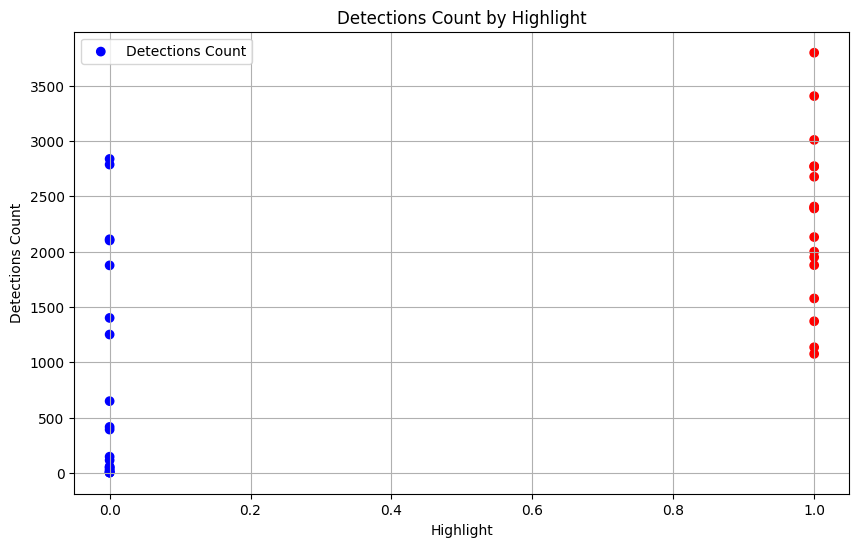

Correlation between worms and detections_count: 0.6492885001000605


In [87]:
highlight_colors = merged_df['highlight'].map({0: 'blue', 1: 'red'})

plt.figure(figsize=(10, 6))
plt.scatter(merged_df['highlight'], merged_df['detections_count'], c=highlight_colors, label='Detections Count')
plt.xlabel('Highlight')
plt.ylabel('Detections Count')
plt.title('Detections Count by Highlight')
plt.grid(True)
plt.legend()
plt.show()

# Calculate and display the correlation number
correlation = merged_df['highlight'].corr(merged_df['detections_count'])
print(f"Correlation between worms and detections_count: {correlation}")

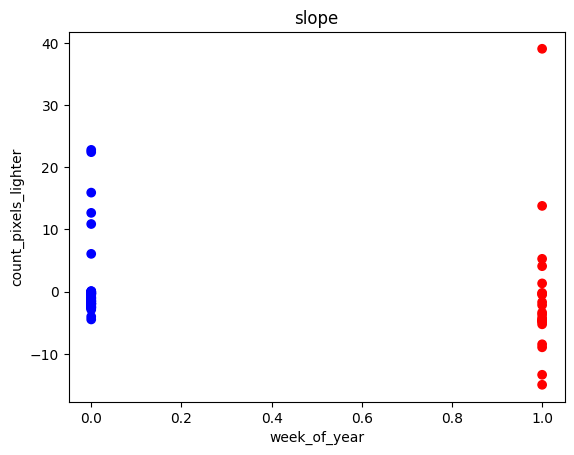

Correlation between slope and count_pixels_lighter: -0.14696536721692652


In [44]:
# Plot the correlation between 'slope' and 'count_pixels_lighter'
highlight_colors = image_data_filtered['highlight'].map({0: 'blue', 1: 'red'})

plt.scatter(image_data_filtered['highlight'], image_data_filtered['slope'], c=highlight_colors)
plt.xlabel('week_of_year')
plt.ylabel('count_pixels_lighter')
plt.title('slope')
plt.show()

# Calculate and display the correlation number
correlation = image_data_filtered['slope'].corr(image_data_filtered['count_pixels_lighter'])
print(f"Correlation between slope and count_pixels_lighter: {correlation}")